**Instructions:**

- For questions that require coding, you need to write the relevant code and display its output. Your output should either be the direct answer to the question or clearly display the answer in it.
- For questions that require a written answer (sometimes along with the code), you need to put your answer in a Markdown cell. Writing the answer as a comment or as a print line is not acceptable.
- You need to render this file as HTML using Quarto and submit the HTML file. **Please note that this is a requirement and not optional.** A submission cannot be graded until it is properly rendered.

Import all the libraries and tools you need below.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import DBSCAN

Run the cell given below to create and plot the same two toy datasets from the previous in-class assignment.

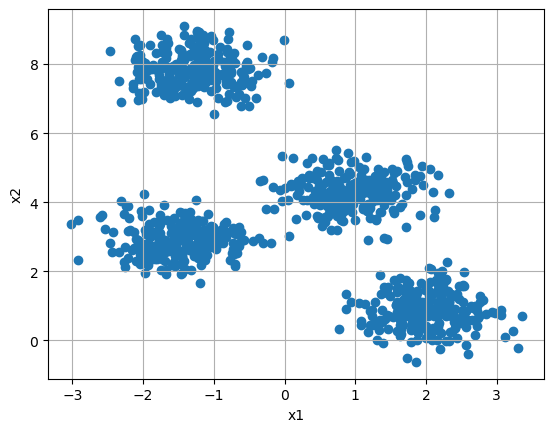

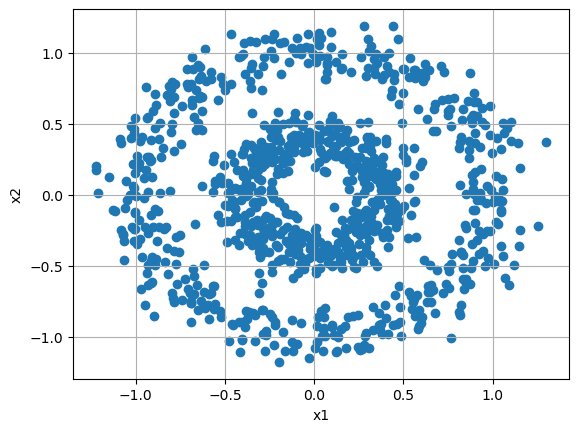

In [2]:
n_samples = 1000
n_components = 4

X_blob, true_labels_blob = make_blobs(n_samples=n_samples, centers=4, cluster_std=0.50, random_state=0)
X_circ, true_labels_circ = make_circles(n_samples=n_samples, noise=0.1, random_state=0,factor=0.4)

plt.scatter(X_blob[:,0],X_blob[:,1])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.scatter(X_circ[:,0],X_circ[:,1])
plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 1)

Copy the `E_step` and `M_step` functions you wrote in the previous in-class assignment here. **(1 point)**

In [3]:
# Copy the step wrote in the last class assignment
def M_step(X, cluster_preds):
    # Change X, cluster_preds to dataframe
    X = pd.DataFrame(X)
    cluster_preds = pd.DataFrame(cluster_preds, columns = ['cluster'])
    # Concat
    X_concat = pd.DataFrame(pd.concat([X, cluster_preds], axis = 1))
    # group the data by clusters
    X_concat = X_concat.groupby(['cluster'])
    # Change back to array
    return np.array(X_concat.mean())

def E_step(X, centroids):
    # Convert X to dataframe
    X = pd.DataFrame(X)
    # Get the centroids into dataframe
    centroids = pd.DataFrame(centroids)
    # Apply the function fot finding Euclidean distance
    # Function to calculate Euclidean distances and return the index of the closest centroid
    def closest_centroid(row):
        # Numpy automatically boosts the size of row to match with centroids
        distances = np.linalg.norm(centroids.values - row.values, axis=1)
        # Smallest distance among the array, return indices
        return np.argmin(distances)
    
    # Apply the function to each row in X_df (set axis = 1 for apply)
    cluster_labels = X.apply(closest_centroid, axis=1)
    return np.array(cluster_labels)
    

## 2)

Define a function called `expectation_maximization`. It should take three inputs: (1) `X`, the variable matrix, (2) `num_clusters`, the number of clusters the algorithm finds, and (3) `random_state`, a random seed for reproducibility.

The function should:

- Create a [random seed](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) with the input `random_state`.
- [Initialize](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) a vector of random cluster labels. Note that each observation in `X` should have a label.
- Run the Expectation Maximization (EM) algorithm by alternating between the `M_step` and the `E_step` until convergence, which means the labels  no longer change.
- Create a color-coded scatter plot of the clustered data (`X`) in each iteration.
- Return the predicted cluster labels and centroids.

**Note:** If you use Jupyter, you can use `clear_output(wait=True)` at the top of your visualization lines to make your consecutive figures replace each other, which would visualize the convergence better. If you do not use Jupyter, you can either find another way or simply plot multiple figures. **(This is not mandatory.)**

**(64 points)**

In [14]:
# Define a function
def expectation_maximization(X, num_clusters, random_state):
    # Create X as dataframe
    X = pd.DataFrame(X)
    # create a random seed from a random state
    np.random.seed(random_state)
    # Initialize the vector of random cluster labels (Max at num_clusters and size equal to num of observation)
    random_cluster = np.random.randint(num_clusters, size= X.shape[0])
    # Run the EM algorithm 
    random_cluster_array = [np.zeros(X.shape[0]), random_cluster]
    # Plot first scatter plot
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c = random_cluster)
    while np.linalg.norm(random_cluster_array[-1] - random_cluster_array[-2]) > 0:
        # get the centroid
        centroids = M_step(X, random_cluster_array[-1])
        new_cluster = E_step(X, centroids)
        random_cluster_array.append(new_cluster)
        # Plot the scatter plot
        clear_output(wait= True)
        plt.scatter(X.iloc[:,0], X.iloc[:,1], c = new_cluster)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')  # Plot centroids
        plt.show()
    # Return the final cluster and centroids
    return random_cluster_array[-1], centroids

    


## 3)

Run the `expectation_maximization` function with the two toy datasets and their proper number of clusters. You should see the correct clusters in one dataset and incorrect clusters in the other.

Find a `random_state` that works (for the dataset that should return the correct clusters). Note that not every `random_state` will work, because random initialization is not the most robust way to start the EM algorithm for a K-Means model. This is fine for the purposes of this assignment; scikit-learn has different ways to initialize the model.

**(5 points)**

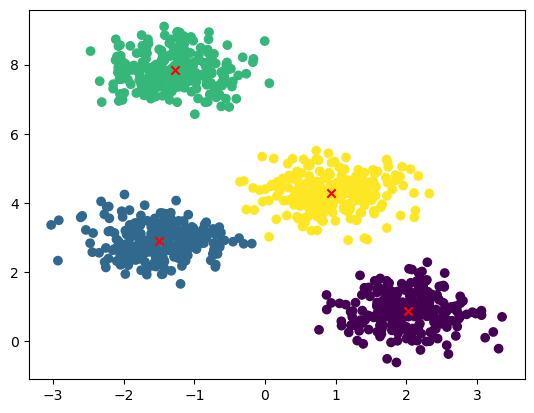

(array([2, 3, 2, 1, 0, 3, 3, 0, 3, 3, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 3, 2,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 3, 1, 1, 3, 3, 3, 1,
        2, 3, 3, 2, 1, 3, 0, 3, 3, 1, 2, 0, 3, 3, 2, 2, 0, 0, 1, 1, 1, 2,
        3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 1, 0, 3, 3, 3, 1, 0, 3, 3, 3,
        1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 3, 3, 0, 1, 3, 0, 3, 1, 3, 2, 1, 0,
        3, 3, 1, 2, 1, 1, 3, 1, 0, 0, 0, 2, 1, 1, 3, 0, 3, 2, 1, 0, 0, 3,
        1, 3, 3, 3, 1, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0, 3, 3, 3,
        1, 3, 3, 3, 0, 1, 2, 0, 3, 3, 3, 3, 2, 2, 3, 0, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 3, 1, 3, 1, 3, 3, 1, 0, 1, 0, 2, 1, 3, 0, 0, 1, 2, 1, 2,
        1, 1, 1, 3, 2, 2, 0, 0, 1, 3, 2, 3, 2, 1, 3, 2, 1, 3, 3, 0, 0, 2,
        3, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 1, 0, 1, 0, 0, 1, 3, 1,
        0, 0, 2, 2, 2, 2, 2, 2, 3, 1, 2, 1, 1, 0, 1, 3, 2, 3, 0, 2, 3, 0,
        2, 1, 3, 1, 2, 0, 0, 3, 0, 1, 2, 2, 1, 2, 1, 3, 0, 2, 1, 3, 1, 1,
        1, 3, 1, 2, 0, 1, 3, 2, 2, 0, 

In [15]:
# Run the algorithm
expectation_maximization(X_blob, num_clusters = 4, random_state = 2)

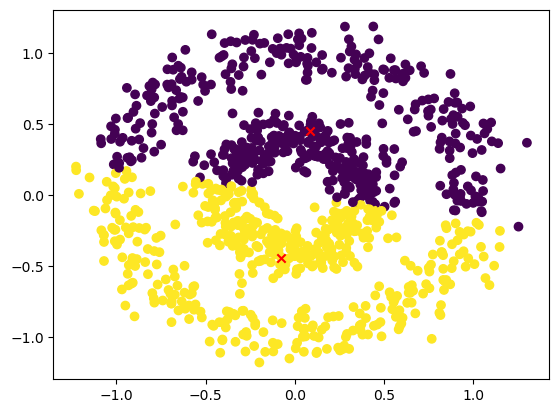

(array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 

In [18]:
# For the x_circ
expectation_maximization(X_circ, num_clusters = 2, random_state = 3)

## 4)

### a)

Finally, create a [DB-SCAN](https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html) model to cluster the dataset for which the K-Means model did not work. Use `eps=0.11` and leave everything else as default. Visualize the clustered dataset with a color-coded scatter plot to see how DB-SCAN performs.

Do you see the correct clusters on the figure or not? What else do you see that was not produced with the K-Means model and the EM algorithm?

**(15 points)**

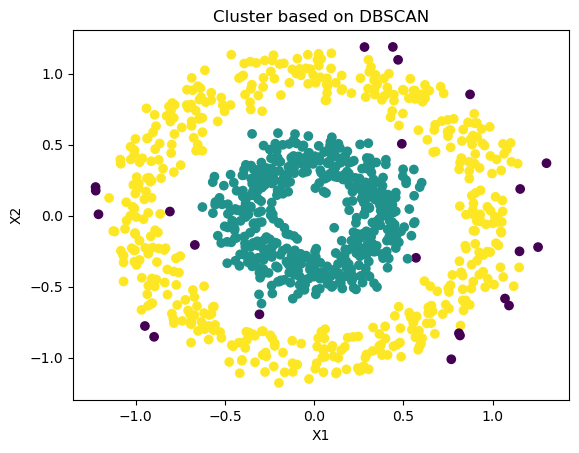

In [20]:
# Create a DB-SCAN 
db_scan = DBSCAN(eps= 0.11)
# Fit the DBSCAN
db_scan.fit(X_circ)

# Color-coded scatter plot
plt.scatter(X_circ[:,0], X_circ[:,1], c = db_scan.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Cluster based on DBSCAN')
plt.show()

DB-scan performs correctly for clustering the circular/cresent dataset above, unlike K-means. In addition, we see the noise points marked with the purple color, which are not existed in EM or K-means clustering. Another different feature of DBSCAN is I do not have to specify the number of clusters.

### b)

Repeat Part a twice: Once with `eps=0.1` and a second time with `eps=0.15`. (Both repetitions should be maintained in the code and the output.) What happens to the clusters with such small changes? What does this say about the DB-SCAN model? **(15 points)**

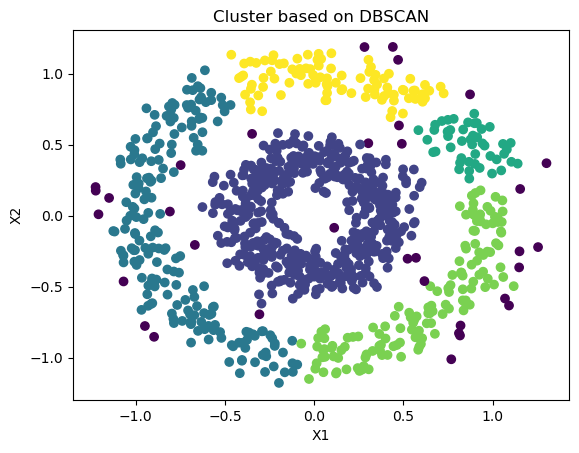

In [21]:
# Create a DB-SCAN 
db_scan = DBSCAN(eps= 0.1)
# Fit the DBSCAN
db_scan.fit(X_circ)

# Color-coded scatter plot
plt.scatter(X_circ[:,0], X_circ[:,1], c = db_scan.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Cluster based on DBSCAN')
plt.show()

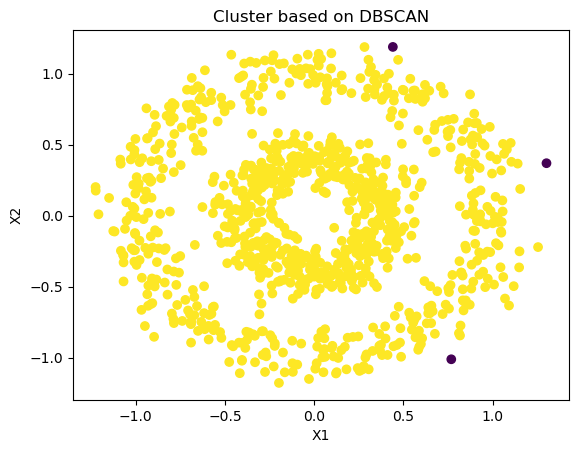

In [22]:
# Create a DB-SCAN 
db_scan = DBSCAN(eps= 0.15)
# Fit the DBSCAN
db_scan.fit(X_circ)

# Color-coded scatter plot
plt.scatter(X_circ[:,0], X_circ[:,1], c = db_scan.labels_)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Cluster based on DBSCAN')
plt.show()

The DBSCAN is very sensitive to the eps -- the maximum distance between two samples for one to be considered as in the neighborhood of the other. If eps changes by a little, the result of clustering through DBSCAN can change significantly.